> This section of the notebook demonstrates the bag of words model
> applied to chat responses sent to a bot and to resumes sent to a
> jobsite.

**Part I: Bag of Words**

------------------------------------------------------------------------

Enjoy!

# 1) Read in our data.

In [1]:
# The input files are Sheet_1 & Sheet_2.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Sheet_1.csv
Sheet_2.csv



In [2]:
# Sheet_1 is the responses to the therapy bot

df = pd.read_csv('../input/Sheet_1.csv', encoding='latin-1')

# Print a good looking dataframe

df = df.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6","Unnamed: 7"], axis = 1)
df = df.rename(columns={"v1":"class", "v2":"Responses"})

df.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [3]:
df["class"].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [4]:
# Sheet_2 is the resumes.

df2 = pd.read_csv('../input/Sheet_2.csv', encoding='latin-1')

df2 = df2.rename(columns={"v1":"class", "v2":"Resumes"})

df2.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [5]:
df2["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

# 2) Generate wordclouds to confirm our data is useful.

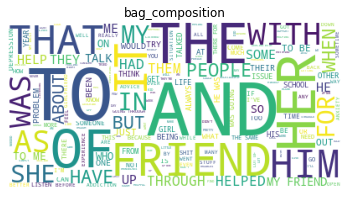

In [6]:


## Bag of response words

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

wordcloud(df['response_text'])

# Looks positive overall, 'friend' is largest, because the bot said: 'Describe a time when you
# have acted as a resource for someone else.'

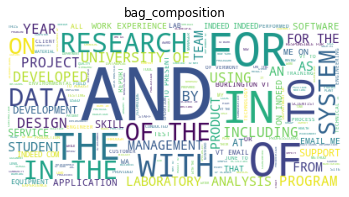

In [7]:
# Bag of resume words

wordcloud(df2['resume_text'])  

# Looks reasonable, 'data' and 'research' are largest

#3) Separate the words.

In [8]:
import operator
from pprint import pprint

def word_freq_bag(dataframe):

    counts = dict()
    bag = []
    counter = 0
    for line in dataframe:
        # print(line)
        words = line.split()
        # print(words)
        for each in words:
            bag.append(each)
    # print(bag)
    for word in bag:
        # print(word)
        # print(counts.get(word,0))
        counts[bag[counter]] = counts.get(word,0)+1        
        #print(counts)
        counter += 1
        
        # if counter == 50: # if you uncomment the print statements, use break (limited memory)
         #   break 

    key = None
    value = None
    keyvalue = dict() # would like to sort by count, dicts are orderless
    for key in counts:
        value = counts[key]
        keyvalue[key] = value
        # rank in descending order of frequency, get a list of tuples sorted by the second
        # element in each tuple
        valueSort1 = sorted(keyvalue.items(), key=operator.itemgetter(1), reverse = True)
        valueSort0 = sorted(keyvalue.items(), key=operator.itemgetter(0), reverse = False)
    # print(counter) # total number of non-unique words
    # print(len(valueSort1)) # every key has a value
    # print(len(valueSort0)) # so these return the same number
    return(valueSort1, valueSort0, counts) 

    
response_word_freq_bag = word_freq_bag(df['response_text'])
# take a look at the words picked out in ascending order of 1st letter 
print(response_word_freq_bag[1])

[('"', 1), ('"hand', 1), ('"please"', 1), ('(as', 1), ('(cocaine)', 1), ('(he', 1), ('(you', 1), ('1n', 1), ('2', 1), ('5', 2), ('50+', 1), ('A', 2), ('Agony', 1), ('Also', 1), ('Always.', 1), ('And', 1), ('Another', 1), ('Anxious', 1), ('Anyway', 1), ('As', 1), ('Aunt"', 1), ('Basically', 1), ('Before', 1), ('But', 2), ('By', 1), ('Cleaning', 1), ('Describe?', 1), ('Did', 1), ("Don't", 1), ('Ended', 1), ('Ex', 1), ('Friend', 3), ('Friends', 2), ("GED's.", 1), ('GF', 1), ('Had', 1), ('Haha.', 1), ('Have', 1), ('Having', 3), ('He', 4), ('Helped', 1), ('Helping', 1), ('Her', 1), ('His', 1), ('Hood', 1), ('I', 84), ("I'd", 2), ("I'll", 3), ("I'm", 5), ("I've", 5), ('Idk', 1), ('In', 1), ('Its', 1), ('LOT', 1), ('Last', 1), ('Let', 1), ('Listened', 1), ('Make', 1), ('Many', 1), ('Mt.', 1), ('My', 8), ('Nah', 1), ('Never', 1), ('Now', 2), ('Offered', 1), ('On', 1), ('One', 1), ('Only', 1), ('Over', 1), ('PLEASE', 1), ('People', 1), ('Probably', 1), ('Roommate', 1), ('She', 4), ('Simply', 2)

In [9]:
# Print the word frequencies in the bag in descending order. 
print(response_word_freq_bag[0]) # you can confirm with a find (& replace) tool. E.g. R IDE

[('to', 104), ('I', 84), ('and', 83), ('a', 60), ('the', 49), ('of', 44), ('was', 40), ('her', 36), ('my', 33), ('with', 31), ('for', 29), ('it', 26), ('me', 24), ('in', 24), ('that', 24), ('as', 24), ('she', 21), ('friend', 20), ('him', 20), ('have', 20), ('friends', 20), ('through', 20), ('people', 19), ('when', 18), ('about', 17), ('but', 17), ('be', 16), ('i', 15), ('he', 15), ('helped', 14), ('had', 14), ('some', 13), ('help', 13), ('they', 12), ('talk', 12), ('them', 12), ('there', 12), ('up', 11), ('going', 10), ('who', 10), ('just', 10), ('try', 9), ('out', 9), ('would', 9), ('on', 9), ('their', 9), ('so', 9), ('been', 9), ('from', 8), ('talked', 8), ('one', 8), ('get', 8), ('being', 8), ('at', 8), ('My', 8), ('his', 7), ('think', 7), ('is', 7), ('if', 7), ('or', 7), ('always', 7), ('what', 7), ('best', 7), ('him.', 7), ('this', 6), ('how', 6), ('girl', 6), ('because', 6), ('someone', 6), ('same', 6), ('not', 6), ('can', 6), ('go', 6), ('come', 6), ('open', 5), ('any', 5), ('sc

In [10]:
# Compute & view for the resumes, if you have a few minutes
# resume_word_freq_bag = word_freq_bag(df2['resume_text']) # Compute the word frequences  
# print(resume_word_freq_bag[0]) # See the most common words (this is commented out, because
# there are 93177 non-unique words (and 1/5th of that number, ~17k, unique words)

# Here is the output down to occurences of 50, if you don't want to uncomment it and run it - 
# [('and', 4629), ('to', 2522), ('of', 2430), ('-', 2021), 
#  ('the', 1706), ('\x8a\x97¢', 1685), ('in', 1683), ('for', 1381), 
#  ('a', 735), ('with', 709), ('on', 637), ('VT', 448), ('as', 354), 
#  ('University', 353), ('data', 346), ('*', 308), ('Research', 275), 
#  ('by', 238), ('I', 235), ('research', 221), ('at', 214), 
#  ('from', 212), ('&', 192), ('including', 185), ('May', 181), 
#  ('analysis', 178), ('using', 173), ('all', 172), ('work', 171), 
#  ('Vermont', 170), ('June', 166), ('an', 165), ('development', 163), 
#  ('2013', 162), ('August', 161), ('new', 151), ('Assistant', 150), 
#  ('Science', 149), ('me', 147), ('Burlington', 143), ('Developed', 143), 
#  ('2014', 142), ('that', 142), ('EXPERIENCE', 132), ('management', 131), 
#  ('College', 128), ('New', 127), ('laboratory', 127), ('software', 126), 
#  ('Email', 125), ('Indeed:', 125), ('WORK', 125), ('Present', 125), 
#  ('EDUCATION', 123), ('2011', 123), ('Environmental', 120), ('was', 119), 
#  ('Engineering', 118), ('o', 114), ('quality', 114), ('2012', 112), 
#  ('support', 112), ('2009', 112), ('January', 111), ('project', 111), 
#  ('students', 111), ('Laboratory', 108), ('team', 107), ('2007', 107), 
#  ('or', 105), ('Scientist', 105), ('2010', 103), ('design', 99), 
#  ('equipment', 99), ('technical', 99), ('September', 99), ('2015', 97), 
#  ('Department', 96), ('2008', 96), ('NY', 95), ('testing', 94), 
#  ('process', 93), ('2005', 93), ('December', 89), ('State', 89), 
#  ('years)', 89), ('other', 88), ('Data', 88), ('Center', 88), 
#  ('The', 87), ('2006', 86), ('experience', 85), ('my', 83), ('is', 81), 
#  ('system', 81), ('water', 81), ('use', 80), ('Biology', 80), ('lab', 79), 
#  ('skills', 78), ('2016', 78), ('MA', 78), ('Medical', 77), ('projects', 76), 
#  ('systems', 76), ('2004', 76), ('March', 75), ('US', 75), 
#  ('ADDITIONAL', 74), ('field', 74), ('business', 74), ('INFORMATION', 73), 
#  ('Development', 73), ('2001', 73), ('reports', 72), ('through', 72), 
#  ('production', 72), ('test', 72), ('product', 71), ('School', 70), 
#  ('April', 70), ('various', 69), ('training', 69), ('materials', 68), 
#  ('samples', 68), ('environmental', 68), ('Engineer', 67), ('SKILLS', 67), 
#  ('October', 66), ('NH', 66), ('Responsible', 65), ('time', 65), 
#  ('July', 64), ('Health', 63), ('into', 62), ('Manager', 62), ('2003', 62), 
#  ('/', 62), ('Assisted', 61), ('Microsoft', 61), ('Performed', 61), 
#  ('customer', 60), ('any', 60), ('years', 59), ('Senior', 59), ('National', 59), 
#  ('2000', 58), ('based', 58), ('well', 57), ('Provided', 57), ('IBM', 57), 
#  ('working', 57), ('Analysis', 57), ('technology', 57), ('techniques', 57), 
#  ('included', 57), ('February', 56), ('were', 56), ('their', 56), ('Project', 56),
#  ('control', 56), ('this', 56), ('study', 56), ('cell', 56), ('information', 55), 
#  ('Inc', 55), ('multiple', 55), ('applications', 55), ('program', 55),
#  ('Design', 55), ('company', 54), ('Technician', 53), ('Management', 53),
#  ('products', 53), ('develop', 53), ('1999', 53), ('during', 52), 
#  ('scientific', 52), ('Managed', 51), ('be', 51), ('Worked', 51), 
#  ('Chemistry', 51), ('staff', 51), ('Responsibilities', 51), 
#  ('professional', 50), ('manufacturing', 50), ('such', 50),

# 4) Create the bags of words. 
##There will be 4 bags - one of flagged responses, one of not_flagged responses, one of flagged resumes, and one of not_flagged resumes.

To move forward with the bag of words model, you need to sample 0.50 of the responses/resumes and then split each of those samples into two bags, one that is full of responses/resumes that were flagged and one that is full of those that were not flagged.

In [11]:
# This is a little bit of an unconventional training set. The bag of words model does not
# pick out features of individual training examples that caused them to be identified as a
# particular class. Instead, it has an aggregate collection of words from all training examples
# identified as a particular class. It classifieds new examples based on this aggregate.

train_df = df.sample(frac = 0.5, axis=0)
test_df = df.sample(frac = 0.5, axis=0)

train_df2 = df2.sample(frac = 0.5, axis=0)
test_df2 = df2.sample(frac = 0.5, axis=0)

train_df_flagged = train_df.loc[train_df['class'] == 'flagged']
train_df_flagged_bag = word_freq_bag(train_df_flagged['response_text'])
print(train_df_flagged_bag[0]) # for example, here you can see the flagged responses' words
train_df_not_flagged = train_df.loc[train_df['class'] == 'not_flagged']
train_df_not_flagged_bag = word_freq_bag(train_df_not_flagged['response_text'])
train_df2_flagged = train_df2.loc[train_df2['class'] == 'flagged']
train_df2_flagged_bag = word_freq_bag(train_df2_flagged['resume_text'])
train_df2_not_flagged = train_df2.loc[train_df2['class'] == 'not_flagged']
train_df_not_flagged.tail() # it's a random sample, so the entries are not ordered, but
# you can see that you are indexing what you want - here's a subset of not_flagged responses
train_df2_not_flagged_bag = word_freq_bag(train_df2_not_flagged['resume_text'])

# You can see printed out first is the number of non-unique words & the number of unique words
# The number of unique words is printed twice, this was to check that each list was the same
# length returned from the word_freq_bag function.
# All good.

[('I', 14), ('to', 14), ('and', 11), ('was', 9), ('a', 9), ('her', 8), ('with', 8), ('of', 7), ('him', 6), ('my', 6), ('in', 6), ('had', 5), ('from', 5), ('when', 5), ('some', 5), ('for', 4), ('the', 4), ('as', 4), ('me', 4), ('he', 4), ('that', 3), ('through', 3), ('it', 3), ('helped', 3), ('be', 3), ('friend', 3), ('friends', 3), ('or', 3), ('best', 3), ('school', 3), ('out', 2), ('issues', 2), ('who', 2), ('up', 2), ('school,', 2), ('very', 2), ('self', 2), ('go', 2), ('him.', 2), ('went', 2), ('his', 2), ('think', 2), ('like', 2), ('5', 2), ('come', 2), ("they've", 2), ('have', 2), ('killed', 2), ('try', 2), ('find', 2), ('comfort', 2), ('so', 2), ('going', 2), ('depression', 2), ('used', 2), ('she', 2), ('what', 2), ('My', 2), ('severe', 2), ('experience', 2), ('get', 2), ('her.', 2), ('ex', 1), ('gf', 1), ('cutter/suicidal,', 1), ('got', 1), ('own', 1), ('while', 1), ('slowly', 1), ('dying', 1), ('inside.', 1), ('Friend', 1), ('big', 1), ('addiction', 1), ('issues,', 1), ('ended'

Then, You're going to multiply together the counts of each response/resume of words that exist both in a new response/resume and also in its parent bag, and you are going to sum the products from these multiplications. Whichever bag produces a higher sum, gets the response/resume. For the model to be successful, it must classify more than 50% of the responses/resumes
correctly.

In [12]:
# You can use the print statements in this code below here to get a clearer picture.

# to convert a string to a dataframe with pandas, in order to reuse word_freq_bag from above
import io
import sys

# mydict1={'response:2,'response2:2,'response6':2,'response8':1}
# mydict2={'response':1,'response2':5,'response8':7}
# mykey=[sum(value * mydict1[key] for key,value in mydict2.items())]
# print(mykey)

def score(a, b):
    mykey=[sum(value * a.get(key,0) for key,value in b.items())]
    # print(b.items())
    # print(a)
    # print(b)
    # global score_counter
    # score_counter += 1
    # if score_counter == 10: # to limit memory so you can run without needing to restart
    #     sys.exit()
    return(mykey)

def classifier_accuracy(text_type, text_id, test_dataframe, train_dataframe_flagged,
                        train_dataframe_flagged_bag, 
                        train_dataframe_not_flagged_bag, length):
    counter = 0
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    random_guess = 1-len(train_dataframe_flagged)/length
    test_dataframe_flagged = test_dataframe.loc[test_dataframe['class'] == 'flagged']
    positive_text = len(test_dataframe_flagged)
    print(positive_text)
    test_dataframe_not_flagged = test_dataframe.loc[test_dataframe['class'] == 'not_flagged']
    negative_text = len(test_dataframe_not_flagged)
    print(negative_text)
    
    # print(train_dataframe_flagged_bag[2])
    for i in test_dataframe[text_id]:
        split_char = i.split('_') # get id from resume_id
        integer = int(float(split_char[1])) -1 # acess by index, one less that resume_id
        text_class = test_dataframe['class'][integer]
        # print(text_class)
        # print(text_class)
        text = test_dataframe[text_type][integer]
        # convert string to dataframe, make more than wide enough for the text column
        df3 = pd.read_fwf(io.StringIO(text), header=None, widths=[1000000], names=[text_type])
        # df3 # if you want to see the dataframe for the response/resume
        text_bag = word_freq_bag(df3[text_type]) 
        # print(text_bag[2])
        # print("ok, here goes:")
        
        
        score_flagged = score(text_bag[2], train_dataframe_flagged_bag[2]) # 2 is counts dict
        #print(score_flagged)
        score_not_flagged = score(text_bag[2], train_dataframe_not_flagged_bag[2])
        #print(score_not_flagged)
        if score_flagged > score_not_flagged and text_class == 'flagged':
            counter += 1
            true_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'not_flagged':
            counter += 1
            true_negative += 1
        elif score_flagged > score_not_flagged and text_class == 'not_flagged':
            counter += 0
            false_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'flagged':
            counter += 0
            false_negative += 1
    return('number of test examples: ' + str(length), 'correct identifications: ' + str(counter), 'pick_randomly_performace: ' + str(random_guess), 'model_performance: ' + str(counter/length), 'false negatives: ' + str((positive_text-false_negative)/positive_text), 'false positives: ' + str((positive_text-true_positive)/positive_text), 'false positive count: ' + str(false_positive) , 'false negative count: ' + str(false_negative))

score_counter = 0
print(classifier_accuracy('response_text', 'response_id', test_df, train_df_flagged, train_df_flagged_bag, train_df_not_flagged_bag, 40))
print(classifier_accuracy('resume_text', 'resume_id', test_df2, train_df2_flagged, train_df2_flagged_bag, train_df2_not_flagged_bag, 62))
    

14
26
('number of test examples: 40', 'correct identifications: 31', 'pick_randomly_performace: 0.725', 'model_performance: 0.775', 'false negatives: 0.5714285714285714', 'false positives: 0.42857142857142855', 'false positive count: 3', 'false negative count: 6')
13
49
('number of test examples: 62', 'correct identifications: 49', 'pick_randomly_performace: 0.8225806451612903', 'model_performance: 0.7903225806451613', 'false negatives: 0.0', 'false positives: 1.0', 'false positive count: 0', 'false negative count: 13')


See previous input cell for false positive calculation and false negative calculation.

If you run 10 trials, your results now look something like this:

 

        trial   | response accuracy |   BL  | false (+) | false (-) | resume accuracy  |   BL   | false (+) | false (-) 
        ------- | ----------------- | ----- | --------- | --------- | ---------------- | ------ | --------- | ---------
        1       |        0.58       |  0.63 |   0.00    |   1.00    |         0.76     |  0.73  |    1.00   |    0.00  
        2       |        0.75       |  0.68 |   0.22    |   0.78    |         0.74     |  0.73  |    1.00   |    0.00
        3       |        0.55       |  0.65 |   0.00    |   1.00    |         0.77     |  0.73  |    1.00   |    0.00
        4       |        0.70       |  0.65 |   0.00    |   1.00    |         0.73     |  0.68  |    1.00   |    0.00
        5       |        0.78       |  0.70 |   0.89    |   0.11    |         0.71     |  0.69  |    1.00   |    0.00
        6       |        0.48       |  0.60 |   0.00    |   1.00    |         0.77     |  0.71  |    1.00   |    0.00
        7       |        0.70       |  0.75 |   1.00    |   0.00    |         0.71     |  0.74  |    1.00   |    0.00
        8       |        0.70       |  0.70 |   0.80    |   0.20    |         0.69     |  0.76  |    1.00   |    0.00
        9       |        0.78       |  0.73 |   0.82    |   0.18    |         0.74     |  0.71  |    1.00   |    0.00  
        10      |        0.68       |  0.68 |   0.80    |   0.20    |         0.77     |  0.76  |    1.00   |    0.00
        ------- | ----------------- | ----- | --------- | --------- | ---------------- | ------ | --------- | ---------
        average          0.67         0.68    0.45        0.55            0.74             0.73        1.00     0.00

In [13]:
# converting string of words in a response, for example, into a data frame (Appendix work)

# text = test_df['response_text'][0]
# df3 = pd.read_fwf(io.StringIO(text), header=None, widths=[1000000], names=['response_text'])
# df3
# text_bag = word_freq_bag(df3['response_text'])
# text_bag

# This is the summing in the bag

mydict1={'response':2,'response2':2,'response6':2,'response8':1}
mydict2={'respose':1,'respone':5,'response8':7}
mykey=[sum(value * mydict1.get(key,0) for key,value in mydict2.items())]
print(mykey)

[7]


The classifier's accuracy on the responses is printed first and its accuracy on the resumes is printed second. It is performing very ***just** OK*.  An accuracy below 100% is technically not acceptable for the responses, but an accuracy as low as 60% may be acceptable for the resumes for large companies that solicit a very high number of resumes, as they can afford to miss some candidates, and getting nearly 2/3 of the good candidates is pretty good. 

You can improve it now. What are your ideas? If you want you can consider some of the extension ideas.

#Extension Ideas

 1. Add Stop Words. The most common word is "to" in the responses
    pool, you can put more weight on other words by removing words like
    "to" before you put the words in the bag.

 1. Normalize. Although, because these are resumes, this may not make
        much of a difference, because most will be 1 page and some 2 pages,
        with a few, generally CVs, being longer.

    

 1. Use CountVectorizer to narrow down the pool of words words,
    remove duplicates, etc.


###You can take a look at 3, "Use CountVectorizer..." below.

In [14]:
# To see the effect of CountVectorizer, you can note the number of words 
# now in the pool of words versus seperating words by hand:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_df = df.sample(frac = 1, axis=0)  # set this to 0.5, you'll have a 
                                        # test set of 40 responses
train_df_mat = vect.fit_transform(train_df['response_text'])
print(train_df_mat.shape) 
# to split into a train and test set, make the sample frac = 0.5, and you will get
# ~ 250-500 words in a sum total of half of the responses
# list of words represented in this train set
print(vect.get_feature_names())
# confirm number of words is 660 (and note the omission of the 832 - 660 = 172 words that were 
# caught with CountVectorizer. For example, below "themselves" & "themselves," are rolled
# together into one "themselves".) 
# This is a benefit of sklearn.
print(len(vect.get_feature_names()))

(80, 660)
['1n', '50', 'able', 'about', 'above', 'absolutely', 'acquaintances', 'acted', 'actions', 'activity', 'addiction', 'adequate', 'admit', 'advice', 'advise', 'after', 'age', 'ago', 'agony', 'alcoholic', 'all', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'an', 'and', 'anniversary', 'another', 'answer', 'answers', 'anxiety', 'anxious', 'any', 'anyone', 'anything', 'anyway', 'apposed', 'are', 'aren', 'around', 'as', 'ask', 'asks', 'at', 'attention', 'aunt', 'avoid', 'away', 'back', 'bad', 'basically', 'be', 'because', 'bedroom', 'been', 'before', 'being', 'best', 'better', 'big', 'bit', 'blow', 'blows', 'blue', 'blunt', 'book', 'both', 'boyfriend', 'break', 'bring', 'brother', 'brought', 'bunch', 'but', 'by', 'call', 'called', 'calling', 'calls', 'calm', 'came', 'camp', 'camping', 'campsite', 'can', 'cancer', 'cant', 'car', 'care', 'caring', 'categories', 'caught', 'cause', 'chance', 'change', 'changed', 'chat', 'circumstances', 'clean', '

In [15]:
# repeat for resume set
# Again, CountVectorizer, significantly decreases the number of words (down from ~17k to ~11k).
vect2 = CountVectorizer()
train_df2 = df2.sample(frac = 1, axis=0) # if the frac is changed to 0.5, 
                                         # get 62 resumes (0.5(floor(125))) ✔️️
                                         # ~ 6-9k words in a sum total of half 
                                         # of the resumes, depending on the sample  
df2_mat = vect2.fit_transform(train_df2['resume_text'])
print(df2_mat.shape)  

# With the full pool of resumes, here we see CountVectorizer finds 11466 unique words.

(125, 11466)


There is a benefit to using CountVectorizer from sklearn - you saw that the words in the bag are more accurately represented as they would be in natural language becuase duplicates were combined. 
The total number of words decreased. 

This is only one idea. Your idea(s) may be better.

###I hope this is useful. 
###Thank you. SP

**Part II: Deep natural language processing**

------------------------------------------------------------------------